# Case Study 2 : Data Mining in Yelp Data


Please download the Yelp dataset in Case Study 2 in BrightSpace. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

What we are going to try to do is predict the amount of stars a restaurant will have given certain features that will be determined later on. This will be useful because it could allow restaurants to see what collection of factors will lead to them being well recieved. They can balance this knowledge out with cost to see how they can be profitable. This problem is important interesting because it can be used by thousands of small businesses across the nation. We are isolating restaurants do we can focus on one sector the the economy. 







# Data Collection/Processing: 

In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas as pd

# load the file data into a Pandas DataFrame
df = pd.read_json('yelp_academic_dataset_business.json', lines = True, nrows = 5000)
#we only take the first 5000 lines because the overall dataset is way too large for us to use on this machine
df

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,None,"Insurance, Financial Services",None
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EGMBR4Quh2tggMkySIKG1g,American Eagle Outfitters,,9617 N Metro Pkwy W,Phoenix,AZ,85051,33.574974,-112.121034,4.0,3,0,{'BusinessAcceptsCreditCards': 'True'},"Fashion, Shopping, Men's Clothing, Women's Clo...",None
4996,ZQBUBnccfiCzQTrEwNy-xw,All American Dave's Fit Food Truck,,4291 Polaris Ave,Las Vegas,NV,89103,36.107558,-115.181217,4.5,9,1,"{'Alcohol': 'none', 'BikeParking': 'True', 'Bu...","Restaurants, Food Trucks, Health & Medical, Gl...","{'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ..."
4997,KxYpQHzuBlnAMmDlxrAoeA,Long Creek Fish Fry,,1031 Lower Dallas Rd,Dallas,NC,28034,35.312525,-81.157819,4.0,4,1,None,"Seafood, Restaurants","{'Wednesday': '15:0-21:0', 'Thursday': '15:0-2..."
4998,ZeEKKLja4xeGuy2nApMpsw,Coney Island Fried Chicken,Unionville,5261 Highway 7 E,Markham,ON,L3P 1B8,43.866732,-79.283908,3.5,9,0,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Food, Restaurants, Fast Food, Chicken Wings","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


In [3]:
df2 = pd.read_json('yelp_academic_dataset_checkin.json', lines = True, nrows = 5000)
#we only take the first 5000 lines because the overall dataset is way too large for us to use on this machine
df2

,checkin_info,type,business_id
0,"{'9-5': 1, '7-5': 1, '13-3': 1, '17-6': 1, '13...",checkin,cE27W9VPgO88Qxe4ol6y_g
1,"{'16-2': 1, '22-5': 1, '9-5': 1, '9-4': 3, '15...",checkin,mVHrayjG3uZ_RLHkLj-AMg
2,"{'23-1': 1, '13-4': 1, '17-6': 1, '15-1': 1, '...",checkin,KayYbHCt-RkbGcPdGOThNg
3,"{'5-5': 2, '5-1': 2, '8-2': 1}",checkin,b12U9TFESStdy7CsTtcOeg
4,"{'15-1': 1, '13-3': 1, '16-0': 1, '9-3': 1, '1...",checkin,QoDa50dc7g62xciFygXB9w
...,...,...,...
4995,"{'22-5': 3, '22-4': 2, '22-3': 1, '22-1': 2, '...",checkin,OfNQed4MVoSyY31YJkJWqA
4996,"{'22-6': 1, '22-4': 1, '22-2': 1, '22-1': 3, '...",checkin,b1d8nKDgizi3K8Jw6llksw
4997,"{'13-5': 1, '19-5': 1, '20-0': 1, '19-1': 1, '...",checkin,FKlr2XmPA7G5MlMFpka1OQ
4998,"{'9-1': 1, '9-0': 1, '9-2': 1, '13-2': 1, '15-...",checkin,0lgNM_dwPKTCn8ah_mnM5Q


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [4]:
dfc = df["categories"]

dfc2 = dfc.str.split(', ')
#now we have a list of each category rather than a string

everything_list = [] #will create a list with every value in category
everything_count = {}#will create a dictionary where the key is the value from category and the value is the number of times it is seen

# for loops to fill the list and dictionary with the correct information as stated above
for x in dfc2:
    if x is not None:
        for y in x:
            if y in everything_list:
                if y in everything_count:
                    everything_count[y] += 1
                else:
                    everything_count[y] = 1
            else:
                everything_list.append(y)
                everything_count[y] = 1

top_10 = {} #creates a top 10 list of which are the most seen categories in the whole dataframe
sorted_categories = sorted(everything_count.items(), key=lambda x: x[1], reverse=True)

for item in sorted_categories[:10]:
    key, value = item
    top_10[key] = value

print(top_10)

{'Restaurants': 1556, 'Shopping': 808, 'Food': 750, 'Home Services': 486, 'Beauty & Spas': 446, 'Health & Medical': 401, 'Local Services': 353, 'Automotive': 346, 'Nightlife': 330, 'Bars': 292}


**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [5]:
checkin_dict = df2.set_index('business_id')['checkin_info'].to_dict()
#creates a dictionary with the business ids as the keys and the checkin info as the valeus
total_checkins_by_business = {}

#adds up the amount of checkins each place has
for business_id, checkin_info in checkin_dict.items():
    total_checkins = sum(checkin_info.values())
    total_checkins_by_business[business_id] = total_checkins

#finds the top 10 places with the most checkins    
top_10pt2 = {}
sorted_checkins = sorted(total_checkins_by_business.items(), key=lambda x: x[1], reverse=True)

for item in sorted_checkins[:10]:
    key, value = item
    top_10pt2[key] = value

print(top_10pt2)

{'hW0Ne_HTHEAgGF1rAdmR-g': 68711, '3Q0QQPnHcJuX1DLCL9G9Cg': 29893, 'R8VwdLyvsp9iybNqRvm94g': 4631, 'sR9lSQiTuBg8zsIw9Zd-Dg': 4136, 'uFJwKlHL6HyHSJmORO8-5w': 3520, 'SDwYQ6eSu1htn8vHWv128g': 3469, 'L9UYbtAUOcfTgZFimehlXw': 3467, 'LzNJLEIo4gh-X_rmDkNkNg': 2656, 'AkOruz5CrCxUmXe1p_WoRg': 2510, 'XLqnjlLYt0_q_NG7l_BpMA': 2384}


**(3) Other explorations you would like to present** 


In [6]:
df.describe(include='all')

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
count,5000,5000,5000,5000,5000,5000,5000,4999.000000,4999.000000,5000.000000,5000.000000,5000.000000,4288,4990,3768
unique,5000,4617,239,4696,299,21,1733,NaN,NaN,NaN,NaN,NaN,2578,3517,2368
top,Apn5Q_b6Nz61Tq4XzPdf9A,Subway,,,Las Vegas,AZ,89119,NaN,NaN,NaN,NaN,NaN,{'BusinessAcceptsCreditCards': 'True'},"Coffee & Tea, Food","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
freq,1,27,3089,214,705,1368,69,NaN,NaN,NaN,NaN,NaN,352,35,203
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.012591,-96.091668,3.614100,28.600800,0.832200,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.196577,17.851947,1.022614,74.476404,0.373726,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.513891,-180.000000,1.000000,3.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.671375,-112.249505,3.000000,4.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.241242,-89.376234,3.500000,8.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.649829,-79.704180,4.500000,23.000000,1.000000,NaN,NaN,NaN


In [7]:
filtered_df = df[df['categories'].str.contains('Restaurant', case=False, na=False)]

# Display the resulting DataFrame
filtered_df

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
7,6OuOZAok8ikONMS_T3EzXg,Thai One On,Ridgewood,"3417 Derry Road E, Unit 103",Mississauga,ON,L4T 1A8,43.712946,-79.632763,2.0,7,1,"{'Alcohol': 'none', 'BusinessAcceptsCreditCard...","Restaurants, Thai",None
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,,1440 N. Dysart Ave,Avondale,AZ,85323,33.448106,-112.341302,2.5,40,1,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Mexican, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,rvnTFEq7R2ZHg0_CYbBNFw,Village Seafood Buffet,,"Rio All-Suite Hotel & Casino, 3700 W. Flamingo...",Las Vegas,NV,89103,36.118117,-115.187298,3.5,820,0,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...","Restaurants, Buffets, Seafood","{'Monday': '15:30-21:30', 'Tuesday': '15:30-21..."
4996,ZQBUBnccfiCzQTrEwNy-xw,All American Dave's Fit Food Truck,,4291 Polaris Ave,Las Vegas,NV,89103,36.107558,-115.181217,4.5,9,1,"{'Alcohol': 'none', 'BikeParking': 'True', 'Bu...","Restaurants, Food Trucks, Health & Medical, Gl...","{'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ..."
4997,KxYpQHzuBlnAMmDlxrAoeA,Long Creek Fish Fry,,1031 Lower Dallas Rd,Dallas,NC,28034,35.312525,-81.157819,4.0,4,1,None,"Seafood, Restaurants","{'Wednesday': '15:0-21:0', 'Thursday': '15:0-2..."
4998,ZeEKKLja4xeGuy2nApMpsw,Coney Island Fried Chicken,Unionville,5261 Highway 7 E,Markham,ON,L3P 1B8,43.866732,-79.283908,3.5,9,0,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...","Food, Restaurants, Fast Food, Chicken Wings","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


In [8]:
print(filtered_df['attributes'])

0       {'BikeParking': 'False', 'BusinessAcceptsCredi...
1       {'Alcohol': 'none', 'BikeParking': 'False', 'B...
2       {'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...
7       {'Alcohol': 'none', 'BusinessAcceptsCreditCard...
8       {'Alcohol': 'none', 'Ambience': '{'romantic': ...
                              ...                        
4992    {'Alcohol': 'full_bar', 'Ambience': '{'romanti...
4996    {'Alcohol': 'none', 'BikeParking': 'True', 'Bu...
4997                                                 None
4998    {'Alcohol': 'none', 'Ambience': '{'romantic': ...
4999    {'Alcohol': 'none', 'Ambience': '{'romantic': ...
Name: attributes, Length: 1556, dtype: object


In [9]:
import pandas as pd

# creates a copy of the dataframe
df_split_attributes = filtered_df.copy()

# makes sure the values are in dictionary format
df_split_attributes['attributes'] = df_split_attributes['attributes'].fillna({})

# make new columns for each attribute
for index, row in df_split_attributes.iterrows():
    attributes = row['attributes']
    if attributes is not None:
        for key, value in attributes.items():
            # Create a new column for each attribute key
            df_split_attributes.at[index, key] = value

# drops 'attributes' column
df_split_attributes = df_split_attributes.drop('attributes', axis=1)

df_split_attributes

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Corkage,GoodForDancing,HappyHour,Music,Smoking,ByAppointmentOnly,RestaurantsCounterService,BusinessAcceptsBitcoin,Open24Hours,AcceptsInsurance
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6OuOZAok8ikONMS_T3EzXg,Thai One On,Ridgewood,"3417 Derry Road E, Unit 103",Mississauga,ON,L4T 1A8,43.712946,-79.632763,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,,1440 N. Dysart Ave,Avondale,AZ,85323,33.448106,-112.341302,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,rvnTFEq7R2ZHg0_CYbBNFw,Village Seafood Buffet,,"Rio All-Suite Hotel & Casino, 3700 W. Flamingo...",Las Vegas,NV,89103,36.118117,-115.187298,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4996,ZQBUBnccfiCzQTrEwNy-xw,All American Dave's Fit Food Truck,,4291 Polaris Ave,Las Vegas,NV,89103,36.107558,-115.181217,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
4997,KxYpQHzuBlnAMmDlxrAoeA,Long Creek Fish Fry,,1031 Lower Dallas Rd,Dallas,NC,28034,35.312525,-81.157819,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,ZeEKKLja4xeGuy2nApMpsw,Coney Island Fried Chicken,Unionville,5261 Highway 7 E,Markham,ON,L3P 1B8,43.866732,-79.283908,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
null_counts = df_split_attributes.isnull().sum()
#shows the amount of nulls in each column

print(null_counts)

business_id                      0
name                             0
neighborhood                     0
address                          0
city                             0
state                            0
postal_code                      0
latitude                         0
longitude                        0
stars                            0
review_count                     0
is_open                          0
categories                       0
hours                          386
BikeParking                    501
BusinessAcceptsCreditCards     248
BusinessParking                286
GoodForKids                    218
HasTV                          351
NoiseLevel                     458
OutdoorSeating                 267
RestaurantsAttire              253
RestaurantsDelivery            218
RestaurantsGoodForGroups       197
RestaurantsPriceRange2         161
RestaurantsReservations        215
RestaurantsTakeOut             158
Alcohol                        384
Caters              

In [11]:
attributes_to_avg_stars = [
    'BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking', 'GoodForKids', 'HasTV',
    'NoiseLevel', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
    'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTakeOut', 'Alcohol', 'Caters', 'DogsAllowed',
    'DriveThru', 'GoodForMeal', 'RestaurantsTableService', 'WheelchairAccessible', 'WiFi', 'Ambience', 'BYOB',
    'BYOBCorkage', 'BestNights', 'CoatCheck', 'Corkage', 'GoodForDancing', 'HappyHour', 'Music', 'Smoking',
    'ByAppointmentOnly', 'RestaurantsCounterService', 'BusinessAcceptsBitcoin', 'Open24Hours', 'AcceptsInsurance'
]
#performing this code because we need to find how impactful each attribute is to the star rating
for attribute in attributes_to_avg_stars:
    avg_stars = df_split_attributes.groupby(attribute)["stars"].mean()
    print(f"Average stars for {attribute}:\n{avg_stars}\n")


Average stars for BikeParking:
BikeParking
False    3.448617
True     3.543641
Name: stars, dtype: float64

Average stars for BusinessAcceptsCreditCards:
BusinessAcceptsCreditCards
False    3.650000
True     3.415064
Name: stars, dtype: float64

Average stars for BusinessParking:
BusinessParking
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}    3.369608
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': True}     3.500000
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     3.520142
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': True}      3.200000
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}     3.664502
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': True}      3.900000
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}      3.718750
{'garage': True, 'street

In [12]:
correlation_matrix = df_split_attributes.corrwith(df_split_attributes['stars'])

# Display the correlation matrix
print(correlation_matrix)

C:\Users\adam\AppData\Local\Temp\ipykernel_8600\1128902249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_split_attributes.corrwith(df_split_attributes['stars'])


latitude        0.046082
longitude       0.033903
stars           1.000000
review_count    0.151290
is_open         0.017406
dtype: float64


In [13]:
# check for nulls in these columns
columns_to_check = ['NoiseLevel', 'RestaurantsAttire', 'Caters']

#creates a new dataframe without nulls in these columns
df_filtered2 = df_split_attributes.dropna(subset=columns_to_check).copy()
df_filtered2 = df_filtered2.dropna(axis=1)

df_filtered2.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,NoiseLevel,RestaurantsAttire,Caters
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"Breakfast & Brunch, Restaurants, French, Sandw...",average,casual,False
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,,1440 N. Dysart Ave,Avondale,AZ,85323,33.448106,-112.341302,2.5,40,1,"Mexican, Restaurants",average,casual,False
11,tZnSodhPwNr4bzrwJ1CSbw,Southern Accent Restaurant,Palmerston,595 Markham Street,Toronto,ON,M6G 2L7,43.664125,-79.411886,4.0,146,0,"Cajun/Creole, Southern, Restaurants",average,casual,True
12,_c3ixq9jYKxhLUB0czi0ug,Original Hamburger Works,,2801 N 15th Ave,Phoenix,AZ,85007,33.479807,-112.091188,4.0,277,1,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",average,casual,False
16,r89Re4FNgVWHgBfjCVZyVw,Harlow,Ville-Marie,438 Place Jacques Cartier,Montréal,QC,H2Y 3B3,45.507699,-73.553407,3.5,12,0,"Nightlife, Bars, American (Traditional), Tapas...",average,dressy,False


In [14]:
# replaces each categorical value with a numerical one
cater_mapping = {'False': 0, 'True': 1}
df_filtered2['Caters'] = df_filtered2['Caters'].replace(cater_mapping)

noise_level_mapping = {'quiet': 3, 'average': 2, 'loud': 1, 'very_loud': 0}
df_filtered2['NoiseLevel'] = df_filtered2['NoiseLevel'].replace(noise_level_mapping)

attire_mapping = {'formal': 0, 'casual': 1, 'dressy': 2}
df_filtered2['RestaurantsAttire'] = df_filtered2['RestaurantsAttire'].replace(attire_mapping)

df_filtered2

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,NoiseLevel,RestaurantsAttire,Caters
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"Breakfast & Brunch, Restaurants, French, Sandw...",2,1,0
8,8-NRKkPY1UiFXW20WXKiXg,Filiberto's Mexican Food,,1440 N. Dysart Ave,Avondale,AZ,85323,33.448106,-112.341302,2.5,40,1,"Mexican, Restaurants",2,1,0
11,tZnSodhPwNr4bzrwJ1CSbw,Southern Accent Restaurant,Palmerston,595 Markham Street,Toronto,ON,M6G 2L7,43.664125,-79.411886,4.0,146,0,"Cajun/Creole, Southern, Restaurants",2,1,1
12,_c3ixq9jYKxhLUB0czi0ug,Original Hamburger Works,,2801 N 15th Ave,Phoenix,AZ,85007,33.479807,-112.091188,4.0,277,1,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",2,1,0
16,r89Re4FNgVWHgBfjCVZyVw,Harlow,Ville-Marie,438 Place Jacques Cartier,Montréal,QC,H2Y 3B3,45.507699,-73.553407,3.5,12,0,"Nightlife, Bars, American (Traditional), Tapas...",2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,VVUL1lzBOipXJlOG1wURMg,Tangerine Asian Cuisine,,"7690 Markham Rd, Unit 4C",Markham,ON,L3S 3S1,43.852986,-79.255643,3.5,82,1,"Restaurants, Chinese",2,1,1
4990,nG59soBP2SaQ25rf2n-0bA,Atlanta Bread,,1905 S Neil St,Champaign,IL,61820,40.092944,-88.245995,3.0,43,0,"Bakeries, Food, Restaurants, Cafes, Sandwiches...",2,1,1
4992,rvnTFEq7R2ZHg0_CYbBNFw,Village Seafood Buffet,,"Rio All-Suite Hotel & Casino, 3700 W. Flamingo...",Las Vegas,NV,89103,36.118117,-115.187298,3.5,820,0,"Restaurants, Buffets, Seafood",2,1,0
4998,ZeEKKLja4xeGuy2nApMpsw,Coney Island Fried Chicken,Unionville,5261 Highway 7 E,Markham,ON,L3P 1B8,43.866732,-79.283908,3.5,9,0,"Food, Restaurants, Fast Food, Chicken Wings",0,1,0


In [15]:
df_model = df_filtered2[['business_id', 'stars', 'name', 'NoiseLevel', 'review_count', 'RestaurantsAttire', 'Caters']].copy()

df_model

,business_id,stars,name,NoiseLevel,review_count,RestaurantsAttire,Caters
2,O8S5hYJ1SMc8fA4QBtVujA,4.0,La Bastringue,2,5,1,0
8,8-NRKkPY1UiFXW20WXKiXg,2.5,Filiberto's Mexican Food,2,40,1,0
11,tZnSodhPwNr4bzrwJ1CSbw,4.0,Southern Accent Restaurant,2,146,1,1
12,_c3ixq9jYKxhLUB0czi0ug,4.0,Original Hamburger Works,2,277,1,0
16,r89Re4FNgVWHgBfjCVZyVw,3.5,Harlow,2,12,2,0
...,...,...,...,...,...,...,...
4986,VVUL1lzBOipXJlOG1wURMg,3.5,Tangerine Asian Cuisine,2,82,1,1
4990,nG59soBP2SaQ25rf2n-0bA,3.0,Atlanta Bread,2,43,1,1
4992,rvnTFEq7R2ZHg0_CYbBNFw,3.5,Village Seafood Buffet,2,820,1,0
4998,ZeEKKLja4xeGuy2nApMpsw,3.5,Coney Island Fried Chicken,0,9,1,0


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

I will create  a linear regression and neural network model. Star rating could be seen as a categorical value where the are only a set amount of choices between 1-5 but I want to get a continous value for better accuracy. I decided to use review count, noise level, restaurant attire, and caters as features because they were present in most of the rows and they have a reasonably high correlation to the star level.

Write codes to implement the solution in python:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# put the features as the x value and the dependent varable as the y
x = df_model[['review_count', 'NoiseLevel', 'RestaurantsAttire', 'Caters']]
y = df_model['stars']

# normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# linear regression model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.4829965493982843


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df_model[['review_count', 'NoiseLevel', 'RestaurantsAttire', 'Caters']]
y = df_model['stars']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# learning rate
custom_learning_rate = 0.003  # Set your desired learning rate

# neural network model
model = Sequential()
model.add(Dense(64, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='linear'))

# customize the optimizer with the learning rate
custom_optimizer = RMSprop(learning_rate=custom_learning_rate)

# compile the model
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# train the model
model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2)

# evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"MSE: {mse}")




Epoch 1/75

17/17 [==============================] - 1s 14ms/step - loss: 6.7676 - val_loss: 1.4830
Epoch 2/75
17/17 [==============================] - 0s 5ms/step - loss: 1.7206 - val_loss: 1.0631
Epoch 3/75
17/17 [==============================] - 0s 4ms/step - loss: 1.1189 - val_loss: 0.6103
Epoch 4/75
17/17 [==============================] - 0s 4ms/step - loss: 0.8531 - val_loss: 0.5818
Epoch 5/75
17/17 [==============================] - 0s 4ms/step - loss: 0.6718 - val_loss: 0.5058
Epoch 6/75
17/17 [==============================] - 0s 4ms/step - loss: 0.6084 - val_loss: 0.3945
Epoch 7/75
17/17 [==============================] - 0s 4ms/step - loss: 0.5936 - val_loss: 0.3854
Epoch 8/75
17/17 [==============================] - 0s 4ms/step - loss: 0.4826 - val_loss: 0.4028
Epoch 9/75
17/17 [==============================] - 0s 4ms/step - loss: 0.5203 - val_loss: 0.3893
Epoch 10/75
17/17 [==============================] - 0s 4ms/step - loss: 0.5044 - val_loss: 0.3887
Epoch 11/75
17/

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


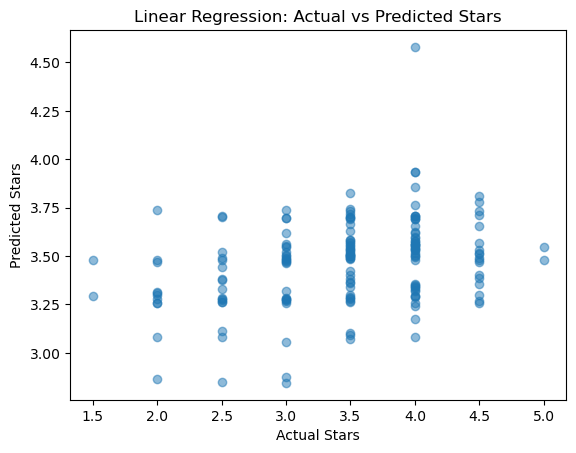

In [18]:
import matplotlib.pyplot as plt

# scatterplot of linear model actual vs predicted star ratings
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Stars')
plt.ylabel('Predicted Stars')
plt.title('Linear Regression: Actual vs Predicted Stars')
plt.show()


6/6 [==============================] - 0s 2ms/step


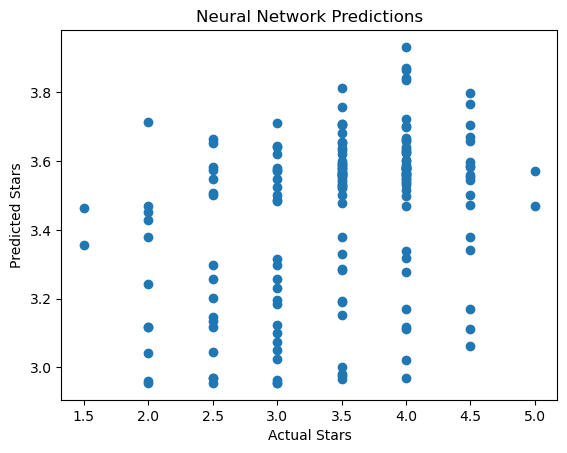

In [19]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_test)

# scatterplot of the neural network actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Stars')
plt.ylabel('Predicted Stars')
plt.title('Neural Network Predictions')
plt.show()


6/6 [==============================] - 0s 2ms/step


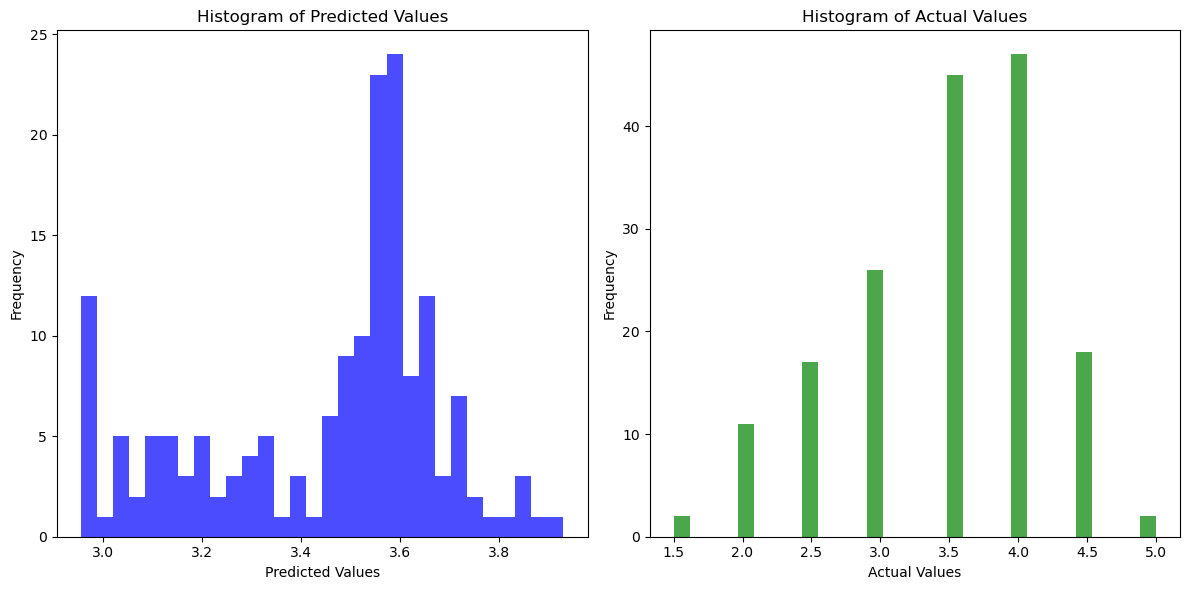

In [20]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

predicted_values = predictions.flatten()
actual_values = y_test.values

# plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(predicted_values, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(actual_values, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


As you can see, the issue with the model is that it does not recognize when a restaurant will have very poor values or very good values. It tends to predict every value in the range of 3-4, meaning that the model predicted is slightly underfitting the data and playing it safe when predicting. This is unfortunate, however, as you can see the actual values lie in the 3-4 range much more than in the other ranges. This means that while the model might be poor at predicting extremes, it does do a good job at predicting a significant portion of businesses. The scatterplot shows how the model tends to overproject the low star restaurants and underprojects the high star restaurants but still puts each on the opposite side of the 3-4 range. This means that the model could give a solid rough estimate of what star rating a restaurant will have.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 